In [1]:
import pandas as pd
import numpy as np
import re
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
#read in your London Commuting Data
# cdata = pd.read_csv("https://www.dropbox.com/s/cxlaa3hd7f6a4gd/london_flows.csv?raw=1")
cdata = pd.read_csv("london_flows.csv")

In [3]:
cdata = cdata[cdata.station_origin != cdata.station_destination]
# Get rid of the "wrong" station
cdata = cdata[(cdata['station_origin'] != 'Battersea Park') & (cdata['station_destination'] != 'Battersea Park')]

In [4]:
cdata[cdata.station_origin == cdata.station_destination]

,station_origin,station_destination,flows,population,jobs,distance


In [5]:
obs = cdata.pivot_table( 'flows', index = 'station_origin', columns = 'station_destination', aggfunc='sum', margins=True,
                      dropna=True)
obs

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [6]:
import scipy.stats

def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    print(f'R2:{R2}')
    
    return R2

# CalcRSquared(cdata["flows"], cdata["unconstrainedEst1"])


In [7]:
from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    print(f'RMSE:{RMSE}')
    
    return RMSE

# CalcRMSE(cdata["flows"], cdata["unconstrainedEst1"])

## Genreral

In [8]:
# def run_models(data):
#     def build_attraction_constrained_model(df):
#         # Your attraction constrained model code here

#     def build_unconstrained_model(df):
#         # Your unconstrained model code here

#     def build_production_constrained_model(df):
#         # Your production constrained model code here

#     def build_doubly_constrained_model(df):
#         # Your doubly constrained model code here

#     def apply_power_decay(df, beta):
#         # Your power decay code here

#     def apply_exponential_decay(df, beta):
#         # Your exponential decay code here
        
#     # Model and distance decay combinations
#     model_builders = {
#         'unconstrained': build_unconstrained_model,
#         'production_constrained': build_production_constrained_model,
#         'attraction_constrained': build_attraction_constrained_model,
#         'doubly_constrained': build_doubly_constrained_model
#     }

#     distance_decays = {
#         'power': apply_power_decay,
#         'exponential': apply_exponential_decay
#     }

#     beta = 1  # Replace this with your chosen beta value
#     results = []

#     for model_name, model_builder in model_builders.items():
#         for decay_name, decay_func in distance_decays.items():
#             # Apply distance decay
#             decayed_df = decay_func(data.copy(), beta)

#             # Build the model
#             model = model_builder(decayed_df)

#             # Extract model parameters
#             params = model.params

#             # Calculate R-squared
#             r_squared = CalcRSquared(decayed_df["flows"], model.mu)

#             # Calculate RMSE
#             rmse = CalcRMSE(decayed_df["flows"], model.mu)

#             result = {
#                 'model': model_name,
#                 'distance_decay': decay_name,
#                 'parameters': params,
#                 'r_squared': r_squared,
#                 'rmse': rmse
#             }
#             results.append(result)

#     return results

# # Example usage:
# results = run_models(merged_df)
# for result in results:
#     print(f"Model: {result['model']}, Distance decay: {result['distance_decay']}, R-squared: {result['r_squared']:.4f}, RMSE: {result['rmse']:.4f}")


## Unconstrained

In [9]:
def build_unconstrained_model_nolog(df):
# Unconstrained model calculation from the provided code snippet
    alpha = 1
    gamma = 1
    beta = 2
    k = 1
    T2 = sum(df["flows"])

    Oi1_alpha = df["population"] ** alpha
    Dj2_gamma = df["jobs"] ** gamma
    dist_beta = df["distance"] ** (-beta)
    T1 = Oi1_alpha * Dj2_gamma * dist_beta
    k = T2 / sum(T1)

    df["unconstrainedEst1"] = k * Oi1_alpha * Dj2_gamma * dist_beta
    df["unconstrainedEst1"] = df["unconstrainedEst1"].astype(int)
    
    dfmat1 = df.pivot_table(values ="unconstrainedEst1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
    CalcRSquared(df["flows"], df["unconstrainedEst1"])
    CalcRMSE(df["flows"], df["unconstrainedEst1"])

    return df, dfmat1
df, uncon_mat = build_unconstrained_model_nolog(cdata)
uncon_mat

R2:0.03461322416920405
RMSE:485.532


station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,555
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,45
Acton Town,NaN,NaN,NaN,1.0,1.0,NaN,1.0,0.0,NaN,1.0,...,1.0,0.0,0.0,1.0,NaN,0.0,NaN,0.0,NaN,541
Aldgate,NaN,NaN,0.0,NaN,149.0,NaN,NaN,0.0,NaN,25.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,9888
Aldgate East,NaN,NaN,0.0,160.0,NaN,NaN,0.0,0.0,NaN,24.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,8006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,278
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
Woodside Park,NaN,NaN,0.0,1.0,1.0,NaN,0.0,NaN,NaN,1.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,169


In [10]:
def log_transform(df, variables):
    log_vars = []
    for var in variables:
        df[f"log_{var}"] = np.log(df[var])
        log_vars.append(f"log_{var}")
    return df, log_vars

def build_poisson_constrained_model(df):
    x_variables = ["population", "jobs", "distance"]
    df, log_x_vars = log_transform(df, x_variables)

    formula = 'flows ~ log_population + log_jobs + log_distance'
    uncosim = smf.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()

    K = uncosim.params[0]
    alpha = uncosim.params[1]
    gamma = uncosim.params[2]
    beta = -uncosim.params[3]


    predictions = uncosim.get_prediction()
    predictions_summary_frame = predictions.summary_frame()
    df["fitted"] = predictions_summary_frame["mean"]
    
    df["unconstrainedEst2"] = np.exp(K + alpha * df["log_population"] + gamma * df["log_jobs"] - beta * df["log_distance"])

    df["unconstrainedEst2"] = round(df["unconstrainedEst2"], 0)
    df["unconstrainedEst2"] = df["unconstrainedEst2"].astype(int)
    
    CalcRSquared(df["flows"], df["unconstrainedEst2"])
    CalcRMSE(df["flows"], df["unconstrainedEst2"])

    dfmat2 = df.pivot_table(values="unconstrainedEst2", index="station_origin", columns="station_destination",
                            aggfunc=np.sum, margins=True)
    return df, dfmat2

# Example usage:
cdata_logged, log_vars = log_transform(cdata.copy(), ["population", "jobs", "distance"])
df, poisson_mat = build_poisson_constrained_model(cdata_logged)

poisson_mat


R2:0.3211903577361867
RMSE:108.334


station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,392
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,333
Acton Town,NaN,NaN,NaN,21.0,21.0,NaN,7.0,1.0,NaN,22.0,...,18.0,3.0,6.0,11.0,NaN,2.0,NaN,3.0,NaN,3862
Aldgate,NaN,NaN,7.0,NaN,81.0,NaN,NaN,1.0,NaN,47.0,...,14.0,NaN,8.0,6.0,NaN,3.0,NaN,3.0,NaN,6107
Aldgate East,NaN,NaN,7.0,85.0,NaN,NaN,3.0,1.0,NaN,48.0,...,14.0,3.0,8.0,7.0,NaN,3.0,NaN,3.0,NaN,6470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,26.0,28.0,NaN,NaN,NaN,NaN,25.0,...,14.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3707
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
Woodside Park,NaN,NaN,5.0,18.0,18.0,NaN,2.0,NaN,NaN,21.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2648


In [11]:
df

,station_origin,station_destination,flows,population,jobs,distance,unconstrainedEst1,log_population,log_jobs,log_distance,fitted,unconstrainedEst2
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9,6.395262,11.271478,9.003504,49.617996,50
1,Abbey Road,Beckton,1,599,442,8510.121774,0,6.395262,6.091310,9.049012,0.937195,1
2,Abbey Road,Blackwall,3,599,665,3775.448872,0,6.395262,6.499787,8.236275,2.121375,2
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,18,6.395262,10.981421,8.534348,53.297014,53
4,Abbey Road,Canning Town,37,599,15428,2228.923167,25,6.395262,9.643939,7.709274,32.208586,32
...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,1,8.973605,8.114325,9.503144,21.756302,22
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,7,8.973605,8.610137,9.071245,41.516290,42
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,0,8.973605,5.991465,9.162905,5.348487,5
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,3,8.973605,6.794587,8.585832,14.114468,14


In [12]:
obs

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


## ProdCons

In [13]:
import re
def add_Oi_Dj(merged_df): # O_i and D_j are not used in the model
        if 'O_i' in merged_df.columns:
            merged_df.drop(columns=['O_i'], inplace=True)
            print("dropped O_i")
        O_i = pd.DataFrame(merged_df.groupby(["station_origin"])["flows"].agg(np.sum))
        O_i.rename(columns={"flows": "O_i"}, inplace=True)
        merged_df = merged_df.merge(O_i, on="station_origin", how="left")
        print("added O_i")
        
        if 'D_j' in merged_df.columns:
            merged_df.drop(columns=['D_j'], inplace=True)
            print("dropped D_j")
        D_j = pd.DataFrame(merged_df.groupby(["station_destination"])["flows"].agg(np.sum))
        D_j.rename(columns={"flows": "D_j"}, inplace=True)
        merged_df = merged_df.merge(D_j, on="station_destination", how="left")
        print("added D_j")
        
        return merged_df
def run_production_constrained_model(df):
    def sanitize_column_content(df, column_name):
        def sanitize_value(value):
            sanitized = re.sub(r"[^a-zA-Z0-9]+", "_", value)
            sanitized = sanitized.strip("_")
            return sanitized

        df[column_name] = df[column_name].apply(sanitize_value)

    def build_production_constrained_model(df):
        dummy_var = 'station_origin'
        dummy_col_prefix = "origin"

        dummy_cols = pd.get_dummies(df[dummy_var], prefix=dummy_col_prefix)
        df = pd.concat([df, dummy_cols], axis=1)

        dummy_vars = ' + '.join(dummy_cols.columns)
        formula = f'flows ~ {dummy_vars} + log_jobs + log_distance-1'

        sim = smf.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()
        return sim

    def extract_parameters(sim):
        alpha_i = sim.params[0:398]
        gamma = sim.params[398]
        beta = -sim.params[399]
        print(f"beta:{beta}")
        return alpha_i, gamma, beta

    def merge_parameters_to_df(df, alpha_i):
        coefs = pd.DataFrame(alpha_i)
        coefs.reset_index(inplace=True)
        coefs.rename(columns={0: "alpha_i", "index": "coef"}, inplace=True)

        coefs['coef'] = coefs['coef'].str.replace('origin_', '')
        df = df.merge(coefs, left_on="station_origin", right_on="coef", how="left")
        df.drop(columns=["coef"], inplace=True)

        return df
    
    def add_model_estimate(df, gamma, beta):
        df["prod_est"] = np.exp(df["alpha_i"] + gamma * df["log_jobs"] - beta * df["log_distance"])
        # df["prod_est"] = round(df["prod_est"], 0)
        return df

    sanitize_column_content(df, 'station_origin')
    sanitize_column_content(df, 'station_destination')

    sim = build_production_constrained_model(df)
    alpha_i, gamma, beta = extract_parameters(sim)
    df = merge_parameters_to_df(df, alpha_i)
    df = add_Oi_Dj(df)
    df = add_model_estimate(df, gamma, beta)

    result_mat = df.pivot_table(values="prod_est", index="station_origin", columns="station_destination",
                                aggfunc=np.sum, margins=True)
    result_mat = result_mat.round(0)  # Add this line to round the matrix elements after summing up the values

    return df, result_mat

# Example usage:
df_prod, prod_con_mat = run_production_constrained_model(cdata_logged)
r_squared = CalcRSquared(df_prod["flows"], df_prod["prod_est"])
print(f"R-squared: {r_squared}")

# Calculate RMSE
rmse = CalcRMSE(df_prod["flows"], df_prod["prod_est"])
print(f"RMSE: {rmse}")

beta:0.8781191183724256
added O_i
added D_j
R2:0.3882685022462436
R-squared: 0.3882685022462436
RMSE:102.893
RMSE: 102.893


In [14]:
df_prod

,station_origin,station_destination,flows,population,jobs,distance,unconstrainedEst1,log_population,log_jobs,log_distance,fitted,unconstrainedEst2,alpha_i,O_i,D_j,prod_est
0,Abbey_Road,Bank_and_Monument,0,599,78549,8131.525097,9,6.395262,11.271478,9.003504,49.617996,50,3.250242,599,78549,55.010681
1,Abbey_Road,Beckton,1,599,442,8510.121774,0,6.395262,6.091310,9.049012,0.937195,1,3.250242,599,442,0.986106
2,Abbey_Road,Blackwall,3,599,665,3775.448872,0,6.395262,6.499787,8.236275,2.121375,2,3.250242,599,665,2.755640
3,Abbey_Road,Canary_Wharf,1,599,58772,5086.514220,18,6.395262,10.981421,8.534348,53.297014,53,3.250242,599,58772,66.457296
4,Abbey_Road,Canning_Town,37,599,15428,2228.923167,25,6.395262,9.643939,7.709274,32.208586,32,3.250242,599,15428,49.060970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich_Arsenal,Tower_Gateway,127,7892,3342,13401.795549,1,8.973605,8.114325,9.503144,21.756302,22,6.905590,7892,3342,121.206340
61409,Woolwich_Arsenal,West_Ham,608,7892,5487,8701.454361,7,8.973605,8.610137,9.071245,41.516290,42,6.905590,7892,5487,259.262677
61410,Woolwich_Arsenal,West_India_Quay,6,7892,400,9536.720451,0,8.973605,5.991465,9.162905,5.348487,5,6.905590,7892,400,31.963713
61411,Woolwich_Arsenal,West_Silvertown,81,7892,893,5355.248554,3,8.973605,6.794587,8.585832,14.114468,14,6.905590,7892,893,98.359769


In [15]:
prod_con_mat

station_destination,Abbey_Road,Acton_Central,Acton_Town,Aldgate,Aldgate_East,All_Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon_Park,Wood_Green,Wood_Lane,Wood_Street,Woodford,Woodgrange_Park,Woodside_Park,Woolwich_Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey_Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton_Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1224.0
Acton_Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3745.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2886.0
Aldgate_East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4868.0
Woodgrange_Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside_Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [16]:
obs

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


## Attraction constrained

In [17]:
import re

def add_Oi_Dj(merged_df):
        if 'O_i' in merged_df.columns:
            merged_df.drop(columns=['O_i'], inplace=True)
            print("dropped O_i")
        O_i = pd.DataFrame(merged_df.groupby(["station_origin"])["flows"].agg(np.sum))
        O_i.rename(columns={"flows": "O_i"}, inplace=True)
        merged_df = merged_df.merge(O_i, on="station_origin", how="left")
        print("added O_i")
        
        if 'D_j' in merged_df.columns:
            merged_df.drop(columns=['D_j'], inplace=True)
            print("dropped D_j")
        D_j = pd.DataFrame(merged_df.groupby(["station_destination"])["flows"].agg(np.sum))
        D_j.rename(columns={"flows": "D_j"}, inplace=True)
        merged_df = merged_df.merge(D_j, on="station_destination", how="left")
        print("added D_j")
        
        return merged_df
    
def run_attraction_constrained_model(df):
    def sanitize_column_content(df, column_name):
        def sanitize_value(value):
            sanitized = re.sub(r"[^a-zA-Z0-9]+", "_", value)
            sanitized = sanitized.strip("_")
            return sanitized

        df[column_name] = df[column_name].apply(sanitize_value)

    def build_attraction_constrained_model(df):
        dummy_var = 'station_destination'
        dummy_col_prefix = "destination"

        dummy_cols = pd.get_dummies(df[dummy_var], prefix=dummy_col_prefix)
        df = pd.concat([df, dummy_cols], axis=1)

        dummy_vars = ' + '.join(dummy_cols.columns)
        formula = f'flows ~ {dummy_vars} + log_population + log_distance-1'

        sim = smf.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()
        return sim

    def extract_parameters(sim):
        gamma_j = sim.params[0:398]
        alpha = sim.params[398]
        beta = -sim.params[399]
        print(f"beta:{beta}")
        return alpha, gamma_j, beta

    def merge_parameters_to_df(df, gamma_j):
        coefs = pd.DataFrame(gamma_j)
        coefs.reset_index(inplace=True)
        coefs.rename(columns={0: "gamma_j", "index": "coef"}, inplace=True)

        coefs['coef'] = coefs['coef'].str.replace('destination_', '')
        df = df.merge(coefs, left_on="station_destination", right_on="coef", how="left")
        df.drop(columns=["coef"], inplace=True)

        return df


    def add_model_estimate(df, alpha, beta):
        df["attr_est"] = np.exp(alpha * df["log_population"] + df["gamma_j"] - beta * df["log_distance"])
        # df["attr_est"] = round(df["attr_est"], 0)
        return df

    sanitize_column_content(df, 'station_origin')
    sanitize_column_content(df, 'station_destination')

    sim = build_attraction_constrained_model(df)
    alpha, gamma_j, beta = extract_parameters(sim)
    df = merge_parameters_to_df(df, gamma_j)
    df = add_Oi_Dj(df)
    df = add_model_estimate(df, alpha, beta)

    result_mat = df.pivot_table(values="attr_est", index="station_origin", columns="station_destination",
                                aggfunc=np.sum, margins=True)
    result_mat = result_mat.round(0)  # Add this line to round the matrix elements after summing up the values

    return df, result_mat

# Example usage:
df_attr, attr_con_mat = run_attraction_constrained_model(cdata_logged)
# Calculate R-squared
r_squared = CalcRSquared(df_attr["flows"], df_attr["attr_est"])
print(f"R-squared: {r_squared}")

# Calculate RMSE
rmse = CalcRMSE(df_attr["flows"], df_attr["attr_est"])
print(f"RMSE: {rmse}")


beta:0.6351480703753105
added O_i
added D_j
R2:0.3499420973562216
R-squared: 0.3499420973562216
RMSE:106.012
RMSE: 106.012


In [18]:
df_attr

,station_origin,station_destination,flows,population,jobs,distance,unconstrainedEst1,log_population,log_jobs,log_distance,fitted,unconstrainedEst2,gamma_j,O_i,D_j,attr_est
0,Abbey_Road,Bank_and_Monument,0,599,78549,8131.525097,9,6.395262,11.271478,9.003504,49.617996,50,4.925085,599,78549,53.077519
1,Abbey_Road,Beckton,1,599,442,8510.121774,0,6.395262,6.091310,9.049012,0.937195,1,2.016788,599,442,2.813846
2,Abbey_Road,Blackwall,3,599,665,3775.448872,0,6.395262,6.499787,8.236275,2.121375,2,1.743497,599,665,3.587552
3,Abbey_Road,Canary_Wharf,1,599,58772,5086.514220,18,6.395262,10.981421,8.534348,53.297014,53,4.898678,599,58772,69.639350
4,Abbey_Road,Canning_Town,37,599,15428,2228.923167,25,6.395262,9.643939,7.709274,32.208586,32,3.639456,599,15428,33.386510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich_Arsenal,Tower_Gateway,127,7892,3342,13401.795549,1,8.973605,8.114325,9.503144,21.756302,22,3.751358,7892,3342,81.601879
61409,Woolwich_Arsenal,West_Ham,608,7892,5487,8701.454361,7,8.973605,8.610137,9.071245,41.516290,42,2.574369,7892,5487,33.088410
61410,Woolwich_Arsenal,West_India_Quay,6,7892,400,9536.720451,0,8.973605,5.991465,9.162905,5.348487,5,1.067529,7892,400,6.917988
61411,Woolwich_Arsenal,West_Silvertown,81,7892,893,5355.248554,3,8.973605,6.794587,8.585832,14.114468,14,2.297455,7892,893,34.143705


In [19]:
attr_con_mat

station_destination,Abbey_Road,Acton_Central,Acton_Town,Aldgate,Aldgate_East,All_Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon_Park,Wood_Green,Wood_Lane,Wood_Street,Woodford,Woodgrange_Park,Woodside_Park,Woolwich_Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey_Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,591.0
Acton_Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,589.0
Acton_Town,NaN,NaN,NaN,16.0,16.0,NaN,8.0,1.0,NaN,17.0,...,26.0,3.0,5.0,9.0,NaN,2.0,NaN,2.0,NaN,3540.0
Aldgate,NaN,NaN,6.0,NaN,62.0,NaN,NaN,1.0,NaN,36.0,...,19.0,NaN,6.0,5.0,NaN,2.0,NaN,3.0,NaN,5706.0
Aldgate_East,NaN,NaN,6.0,68.0,NaN,NaN,3.0,1.0,NaN,37.0,...,20.0,2.0,7.0,5.0,NaN,3.0,NaN,3.0,NaN,6032.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,6.0,20.0,21.0,NaN,NaN,NaN,NaN,19.0,...,19.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,3430.0
Woodgrange_Park,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.0
Woodside_Park,NaN,NaN,5.0,14.0,13.0,NaN,2.0,NaN,NaN,16.0,...,15.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2406.0


In [20]:
obs

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [21]:
# import re
# import statsmodels.formula.api as smf
# import statsmodels.api as sm


# def sanitize_column_content(df, column_name):
#     def sanitize_value(value):
#         sanitized = re.sub(r"[^a-zA-Z0-9]+", "_", value)
#         sanitized = sanitized.strip("_")
#         return sanitized

#     df[column_name] = df[column_name].apply(sanitize_value)


# def build_production_constrained_model(merged_df):
#     orig_code_dummies = pd.get_dummies(merged_df['station_origin'], prefix='origin')
#     merged_df = pd.concat([merged_df, orig_code_dummies], axis=1)

#     orig_code_vars = ' + '.join(orig_code_dummies.columns)
#     formula = f'flows ~ {orig_code_vars} + log_jobs + log_distance-1'

#     prod_sim = smf.glm(formula=formula, data=merged_df, family=sm.families.Poisson()).fit()
#     return prod_sim


# def extract_alpha_gamma_beta(prod_sim):
#     alpha_i = prod_sim.params[0:398]
#     gamma = prod_sim.params[398]
#     beta = -prod_sim.params[399]
#     return alpha_i, gamma, beta


# def merge_alpha_i_to_df(merged_df, alpha_i):
#     coefs = pd.DataFrame(alpha_i)
#     coefs.reset_index(inplace=True)
#     coefs.rename(columns={0: "alpha_i", "index": "coef"}, inplace=True)

#     coefs['coef'] = coefs['coef'].str.replace('origin_', '')
#     merged_df = merged_df.merge(coefs, left_on="station_origin", right_on="coef", how="left")
#     merged_df.drop(columns=["coef"], inplace=True)

#     return merged_df


# def add_Oi_Dj(merged_df):
#     O_i = pd.DataFrame(merged_df.groupby(["station_origin"])["flows"].agg(np.sum))
#     O_i.rename(columns={"flows": "O_i"}, inplace=True)
#     merged_df = merged_df.merge(O_i, on="station_origin", how="left")

#     D_j = pd.DataFrame(merged_df.groupby(["station_destination"])["flows"].agg(np.sum))
#     D_j.rename(columns={"flows": "D_j"}, inplace=True)
#     merged_df = merged_df.merge(D_j, on="station_destination", how="left")

#     return merged_df

# def add_prodsimest1(merged_df, gamma, beta):
#     merged_df["prodsimest1"] = np.exp(merged_df["alpha_i"] + gamma * merged_df["log_jobs"] - beta * merged_df["log_distance"])
#     merged_df["prodsimest1"] = round(merged_df["prodsimest1"], 0)
#     return merged_df


# # def CalcRSquared(y_true, y_pred):
# #     y_mean = np.mean(y_true)
# #     ss_res = np.sum((y_true - y_pred) ** 2)
# #     ss_tot = np.sum((y_true - y_mean) ** 2)
# #     return 1 - (ss_res / ss_tot)


# # def CalcRMSE(y_true, y_pred):
# #     mse = np.mean((y_true - y_pred) ** 2)
# #     return np.sqrt(mse)


# # Clean the column content
# sanitize_column_content(df, 'station_origin')
# sanitize_column_content(df, 'station_destination')

# # Run the production-constrained model using Poisson
# prodSim = build_production_constrained_model(df)

# # Extract alpha_i, gamma, and beta from the prodSim model
# alpha_i, gamma, beta = extract_alpha_gamma_beta(prodSim)

# # Merge the alpha_i coefficients back into the dataframe
# df = merge_alpha_i_to_df(df, alpha_i)

# # Calculate O_i and D_j
# df = add_Oi_Dj(df)

# # Calculate prodsimest1
# df = add_prodsimest1(df, gamma, beta)

# # Create a pivot table
# dfmat3 = df.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
#                             aggfunc=np.sum, margins=True)
# obs = df.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
#                             aggfunc=np.sum, margins=True)

# # Calculate R-squared
# r_squared = CalcRSquared(df["flows"], df["prodsimest1"])
# print(f"R-squared: {r_squared}")

# # Calculate RMSE
# rmse = CalcRMSE(df["flows"], df["prodsimest1"])
# print(f"RMSE: {rmse}")

In [22]:
df

,station_origin,station_destination,flows,population,jobs,distance,unconstrainedEst1,log_population,log_jobs,log_distance,fitted,unconstrainedEst2
0,Abbey_Road,Bank_and_Monument,0,599,78549,8131.525097,9,6.395262,11.271478,9.003504,49.617996,50
1,Abbey_Road,Beckton,1,599,442,8510.121774,0,6.395262,6.091310,9.049012,0.937195,1
2,Abbey_Road,Blackwall,3,599,665,3775.448872,0,6.395262,6.499787,8.236275,2.121375,2
3,Abbey_Road,Canary_Wharf,1,599,58772,5086.514220,18,6.395262,10.981421,8.534348,53.297014,53
4,Abbey_Road,Canning_Town,37,599,15428,2228.923167,25,6.395262,9.643939,7.709274,32.208586,32
...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich_Arsenal,Tower_Gateway,127,7892,3342,13401.795549,1,8.973605,8.114325,9.503144,21.756302,22
61470,Woolwich_Arsenal,West_Ham,608,7892,5487,8701.454361,7,8.973605,8.610137,9.071245,41.516290,42
61471,Woolwich_Arsenal,West_India_Quay,6,7892,400,9536.720451,0,8.973605,5.991465,9.162905,5.348487,5
61472,Woolwich_Arsenal,West_Silvertown,81,7892,893,5355.248554,3,8.973605,6.794587,8.585832,14.114468,14


In [23]:
cdata

,station_origin,station_destination,flows,population,jobs,distance,unconstrainedEst1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9
1,Abbey Road,Beckton,1,599,442,8510.121774,0
2,Abbey Road,Blackwall,3,599,665,3775.448872,0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,18
4,Abbey Road,Canning Town,37,599,15428,2228.923167,25
...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,1
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,7
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,0
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,3


## Doubly consrained

In [24]:
df

,station_origin,station_destination,flows,population,jobs,distance,unconstrainedEst1,log_population,log_jobs,log_distance,fitted,unconstrainedEst2
0,Abbey_Road,Bank_and_Monument,0,599,78549,8131.525097,9,6.395262,11.271478,9.003504,49.617996,50
1,Abbey_Road,Beckton,1,599,442,8510.121774,0,6.395262,6.091310,9.049012,0.937195,1
2,Abbey_Road,Blackwall,3,599,665,3775.448872,0,6.395262,6.499787,8.236275,2.121375,2
3,Abbey_Road,Canary_Wharf,1,599,58772,5086.514220,18,6.395262,10.981421,8.534348,53.297014,53
4,Abbey_Road,Canning_Town,37,599,15428,2228.923167,25,6.395262,9.643939,7.709274,32.208586,32
...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich_Arsenal,Tower_Gateway,127,7892,3342,13401.795549,1,8.973605,8.114325,9.503144,21.756302,22
61470,Woolwich_Arsenal,West_Ham,608,7892,5487,8701.454361,7,8.973605,8.610137,9.071245,41.516290,42
61471,Woolwich_Arsenal,West_India_Quay,6,7892,400,9536.720451,0,8.973605,5.991465,9.162905,5.348487,5
61472,Woolwich_Arsenal,West_Silvertown,81,7892,893,5355.248554,3,8.973605,6.794587,8.585832,14.114468,14


In [25]:
def doubly_constrained_model(data, formula='flows ~ station_destination + station_origin + log_distance - 1', family=sm.families.Poisson()):
    # Recalculate O_i and D_j based on the modified jobs data
    # data = add_Oi_Dj(data)
    
    # Run a doubly constrained sim
    doub_sim = smf.glm(formula=formula, data=data, family=family).fit()
    # When the model is fitted using this line
    # the β parameter is estimated along with the other parameters in the model.
    beta = doub_sim.params["log_distance"]
    print(f"beta is {beta}")
   
    # Print the summary
#     print(doub_sim.summary())

    # Get the estimates
    data["doubsimfitted"] = np.round(doub_sim.mu)
    # Create the matrix
    data_mat = data.pivot_table(values="doubsimfitted", index="station_origin", columns="station_destination", aggfunc=np.sum, margins=True)

    return data_mat, doub_sim, data, beta  # Add 'data' to the return values


# Example usage
dbl_form = 'flows ~ station_origin + station_destination + log_distance - 1' # a space between log_distance and -1 indicates inverse instead of intercept neglect
doubly_mat, doub_sim, df, beta_doubly = doubly_constrained_model(df, formula=dbl_form)  # Save the updated DataFrame as 'updated_df'

# Calculate R-squared and RMSE
r_squared = CalcRSquared(df["flows"], df["doubsimfitted"])
rmse = CalcRMSE(df["flows"], df["doubsimfitted"])

print("R-squared:", r_squared)
print("RMSE:", rmse)


beta is -0.9096317604932728
R2:0.40768532292960646
RMSE:101.335
R-squared: 0.40768532292960646
RMSE: 101.335


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61413 entries, 0 to 61473
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61413 non-null  object 
 1   station_destination  61413 non-null  object 
 2   flows                61413 non-null  int64  
 3   population           61413 non-null  int64  
 4   jobs                 61413 non-null  int64  
 5   distance             61413 non-null  float64
 6   unconstrainedEst1    61413 non-null  int64  
 7   log_population       61413 non-null  float64
 8   log_jobs             61413 non-null  float64
 9   log_distance         61413 non-null  float64
 10  fitted               61413 non-null  float64
 11  unconstrainedEst2    61413 non-null  int64  
 12  doubsimfitted        61413 non-null  float64
dtypes: float64(6), int64(5), object(2)
memory usage: 6.6+ MB


In [27]:
doub_sim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    60617
Model Family:                 Poisson   Df Model:                          795
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.7074e+05
Date:                Tue, 02 May 2023   Deviance:                   1.7693e+06
Time:                        11:25:06   Pearson chi2:                 2.47e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
station_origin[Abbey_Road]                           7.7406      0.068    113.622      0.000       7.607       7.874
station_origin[Acton_Central]                        9.3943      0.062    151.877      0.000       9.273       9.515
station_origin[Acton_Town]                           9.1592      0.057    160.351      0.000       9.047       9.271
station_origin[Aldgate]                              7.9266      0.058    137.616      0.000       7.814       8.039
station_origin[Aldgate_East]                         8.0680      0.057    140.691      0.000       7.956       8.180
station_origin[All_Saints]                           7.6657      0.066    116.581      0.000       7.537       7.795
station_origin[Alperton]                             8.7732      0.060    145.809      0.000       8.655       8.891
station_origin[Amersham]                             9.2109      0.062    148.139      0.000       9.089       9.333
station_origin[Anerley]                              9.4733      0.068    139.622      0.000       9.340       9.606
station_origin[Angel]                                8.4354      0.057    148.757      0.000       8.324       8.547
station_origin[Archway]                              9.3262      0.056    165.673      0.000       9.216       9.437
station_origin[Arnos_Grove]                          9.2031      0.058    159.443      0.000       9.090       9.316
station_origin[Arsenal]                              8.1739      0.059    139.185      0.000       8.059       8.289
station_origin[Baker_Street]                         8.9807      0.056    161.027      0.000       8.871       9.090
station_origin[Balham]                              10.0587      0.056    180.680      0.000       9.950      10.168
station_origin[Bank_and_Monument]                   10.0462      0.055    183.386      0.000       9.939      10.154
station_origin[Barbican]                             6.9886      0.061    113.727      0.000       6.868       7.109
station_origin[Barking]                             10.0751      0.056    180.219      0.000       9.966      10.185
station_origin[Barkingside]                          8.7049      0.061    141.617      0.000       8.584       8.825
station_origin[Barons_Court]                         8.8054      0.057    154.920      0.000       8.694       8.917
station_origin[Bayswater]                            7.8137      0.060    129.871      0.000       7.696       7.932
station_origin[Beckton]                              9.1994      0.062    148.528      0.000       9.078       9.321
station_origin[Beckton_Park]                         7.5187      0.080     93.910      0.000       7.362       7.676
station_origin[Becontree]                

In [28]:
doub_sim.params["log_distance"]

-0.9096317604932728

In [29]:
doub_sim.mu

array([ 54.84069422,   2.06192601,   2.69794794, ...,  19.53853697,
       115.29764911,  74.17881454])

In [30]:
%load_ext Cython

In [31]:
%%cython
import numpy as np

# Here is the entropy maximising approach for a known beta.
# Plug in the required values in this function to solve.

cpdef balance_doubly_constrained(pd, orig_field, dest_field, Oi_field, Dj_field, cij_field, beta, 
                               cost_function, Ai_name = "Ai_new", Bj_name = "Bj_new", converge=0.001, max_iterations = 5000):
    # Define some variables
    Oi = pd[[orig_field, Oi_field]]
    Dj = pd[[dest_field, Dj_field]]    
    if cost_function.lower() in ['power','pow']:
        beta_cij = np.exp(beta * np.log(pd[cij_field]))
    elif cost_function.lower() in ['exponential','exp']:
        beta_cij = np.exp(beta * pd[cij_field])
    else:
        return "Cost function not specified properly, use 'exp' or 'pow'"
    
    # Create some helper variables
    cnvg = 1
    iteration = 0
    # Now iteratively rebalance the Ai and Bj terms until convergence
    while cnvg > converge and iteration < max_iterations:
        if iteration == 0:
            # This first condition sets starting values for Ai and Bj
            # NB sets starting value of Ai assuming Bj is a vector of 1s.
            # We've already established beta_cij with the appropriate cost function, so...
            Oi = Oi.assign(Ai = Dj[Dj_field] * beta_cij)
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Now set up Bjs using starting values of Ai
            Dj = Dj.assign(Bj = Oi['Ai_old'] * Oi[Oi_field] * beta_cij)
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Increment loop
            iteration += 1
        else:
            # This bit is the iterated bit of the loop which refines the values of Ai and Bj
            # First Ai
            Oi['Ai'] = Dj['Bj_old'] * Dj[Dj_field] * beta_cij
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Drop temporary Ai
            Oi.drop('Ai', axis=1, inplace=True)
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True)
            # Calculate the difference between old and new Ais
            Oi['diff'] = np.absolute((Oi['Ai_old'] - Oi['Ai'])/Oi['Ai_old'])
            # Set new Ais to Ai_old
            Oi['Ai_old'] = Oi['Ai']
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Then Bj
            Dj['Bj'] = Oi['Ai_old'] * Oi[Oi_field] * beta_cij
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Drop temporary Bj
            Dj.drop('Bj', axis=1, inplace=True)
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True)
            # Calculate the difference between old and new Bjs
            Dj['diff'] = np.absolute((Dj['Bj_old'] - Dj['Bj'])/Dj['Bj_old'])
            # Set new Bjs to Bj_old
            Dj['Bj_old'] = Dj['Bj']
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Assign higher sum difference from Ai or Bj to cnvg
            cnvg = np.maximum(Oi['diff'].sum(),Dj['diff'].sum())
            
            # Print and increment loop
            print("Iteration:", iteration)
            iteration += 1

    # When the while loop finishes add the computed Ai_old and Bj_old to the dataframe and return
    pd[Ai_name] = Oi['Ai_old']
    pd[Bj_name] = Dj['Bj_old']
    return pd

In [32]:
doubly_mat

station_destination,Abbey_Road,Acton_Central,Acton_Town,Aldgate,Aldgate_East,All_Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon_Park,Wood_Green,Wood_Lane,Wood_Street,Woodford,Woodgrange_Park,Woodside_Park,Woolwich_Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey_Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,600.0
Acton_Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton_Town,NaN,NaN,NaN,15.0,15.0,NaN,11.0,1.0,NaN,17.0,...,30.0,3.0,5.0,12.0,NaN,2.0,NaN,2.0,NaN,3747.0
Aldgate,NaN,NaN,2.0,NaN,42.0,NaN,NaN,0.0,NaN,19.0,...,7.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2873.0
Aldgate_East,NaN,NaN,2.0,49.0,NaN,NaN,1.0,0.0,NaN,21.0,...,8.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,31.0,33.0,NaN,NaN,NaN,NaN,29.0,...,29.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange_Park,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside_Park,NaN,NaN,5.0,18.0,17.0,NaN,3.0,NaN,NaN,22.0,...,21.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_matrix(matrix):
    plt.figure(figsize=(16, 12))
    sns.heatmap(matrix, cmap="YlGnBu", linewidths=0.1, annot=True, fmt=".0f", annot_kws={"size": 7})
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

# Example usage:
# visualize_matrix(attr_con_mat)  # Replace 'attr_con_mat' with the matrix you want to visualize


In [34]:
obs

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


## Sce A

IV.1. Scenario A: assume that Canary Wharf has a 50% decrease in jobs after Brexit. Using the 
calibrated parameter , compute the new flows for scenario A. Make sure the number of commuters is 
conserved, and explain how you ensured this.


In [35]:
# # Specify columns of interest
# columns_of_interest = ['O_i', 'D_j', 'log_distance']

# # Find rows with any zero value in the specified columns
# rows_with_zeros = df_Sce_A[(df_Sce_A[columns_of_interest] == 0).any(axis=1)]

# # Print the rows with zeros
# print(rows_with_zeros)


In [36]:
df

,station_origin,station_destination,flows,population,jobs,distance,unconstrainedEst1,log_population,log_jobs,log_distance,fitted,unconstrainedEst2,doubsimfitted
0,Abbey_Road,Bank_and_Monument,0,599,78549,8131.525097,9,6.395262,11.271478,9.003504,49.617996,50,55.0
1,Abbey_Road,Beckton,1,599,442,8510.121774,0,6.395262,6.091310,9.049012,0.937195,1,2.0
2,Abbey_Road,Blackwall,3,599,665,3775.448872,0,6.395262,6.499787,8.236275,2.121375,2,3.0
3,Abbey_Road,Canary_Wharf,1,599,58772,5086.514220,18,6.395262,10.981421,8.534348,53.297014,53,77.0
4,Abbey_Road,Canning_Town,37,599,15428,2228.923167,25,6.395262,9.643939,7.709274,32.208586,32,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich_Arsenal,Tower_Gateway,127,7892,3342,13401.795549,1,8.973605,8.114325,9.503144,21.756302,22,257.0
61470,Woolwich_Arsenal,West_Ham,608,7892,5487,8701.454361,7,8.973605,8.610137,9.071245,41.516290,42,152.0
61471,Woolwich_Arsenal,West_India_Quay,6,7892,400,9536.720451,0,8.973605,5.991465,9.162905,5.348487,5,20.0
61472,Woolwich_Arsenal,West_Silvertown,81,7892,893,5355.248554,3,8.973605,6.794587,8.585832,14.114468,14,115.0


In [37]:
# #@title Convergence problem - Sce A using doubly-constrained
# # Step 1: Apply the 50% decrease in jobs for Canary Wharf
# df_Sce_A = df.copy()
# df_Sce_A.loc[df_Sce_A.station_destination == 'Canary_Wharf', 'jobs'] = df_Sce_A.loc[df_Sce_A.station_destination == 'Canary_Wharf', 'jobs'] * 0.5

# # Step 2: Recalculate O_i and D_j after modifying the jobs data
# df_Sce_A = add_Oi_Dj(df_Sce_A)

# # Step 3: Use the calibrated β from the doubly constrained model
# beta = doub_sim.params["log_distance"]

# # Apply the balance_doubly_constrained function with the appropriate parameters
# df_Sce_A_balanced = balance_doubly_constrained(df_Sce_A, 'station_origin', 'station_destination', 'O_i', 'D_j', 'distance', beta, 'exp')
# df_Sce_A_balanced = balance_doubly_constrained(df_Sce_A, orig_field = 'station_origin', dest_field = 'station_destination', Oi_field = 'O_i', Dj_field = 'D_j', cij_field = 'distance', beta = beta, 
#                                cost_function = 'ex', Ai_name = "Ai_new", Bj_name = "Bj_new", converge=0.001, max_iterations = 5000)

# # Calculate new flows
# df_Sce_A_balanced['new_flows'] = df_Sce_A_balanced['Ai_new'] * df_Sce_A_balanced['O_i'] * df_Sce_A_balanced['Bj_new'] * df_Sce_A_balanced['D_j'] * np.exp(beta * df_Sce_A_balanced['distance'])

# # Check the conservation of commuters
# total_commuters_original = df['flows'].sum()
# total_commuters_new = df_Sce_A_balanced['new_flows'].sum()
# print("Total commuters before:", total_commuters_original)
# print("Total commuters after:", total_commuters_new)

# # The difference should be very small, indicating that the number of commuters is conserved.
# print("Difference:", abs(total_commuters_original - total_commuters_new))


### Modification on original data

In [38]:
df_Sce_A = df.copy()

def adjust_jobs(row):
    if row["station_destination"] == "Canary_Wharf":
        return int(row["jobs"] * 0.5)
    else:
        return row["jobs"]

df_Sce_A["jobs"] = df_Sce_A.apply(adjust_jobs, axis=1)

# Display the modified rows
df_Sce_A[df_Sce_A.station_destination == "Canary_Wharf"]


,station_origin,station_destination,flows,population,jobs,distance,unconstrainedEst1,log_population,log_jobs,log_distance,fitted,unconstrainedEst2,doubsimfitted
3,Abbey_Road,Canary_Wharf,1,599,29386,5086.514220,18,6.395262,10.981421,8.534348,53.297014,53,77.0
126,Acton_Town,Canary_Wharf,57,3745,29386,20398.165882,7,8.228177,10.981421,9.923200,85.923976,86,89.0
348,Aldgate,Canary_Wharf,1,2886,29386,6564.419680,52,7.967627,10.981421,8.789419,143.845208,144,73.0
595,Aldgate_East,Canary_Wharf,3,3172,29386,5127.998899,95,8.062118,10.981421,8.542471,179.782889,180,105.0
817,All_Saints,Canary_Wharf,67,740,29386,1340.088733,325,6.606650,10.981421,7.200491,142.800104,143,239.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60595,Wood_Green,Canary_Wharf,64,6667,29386,16849.246595,18,8.804925,10.981421,9.732061,147.666715,148,196.0
60838,Wood_Lane,Canary_Wharf,0,1088,29386,17092.091760,2,6.992096,10.981421,9.746371,38.791291,39,26.0
61062,Woodford,Canary_Wharf,192,4868,29386,13963.787075,19,8.490438,10.981421,9.544223,131.840216,132,240.0
61294,Woodside_Park,Canary_Wharf,42,3093,29386,22356.567178,4,8.036897,10.981421,10.014875,70.545631,71,98.0


### Doubly-constrained

In [39]:
dbl_form = 'flows ~ station_origin + station_destination + log_distance - 1' # a space between log_distance and -1 indicates inverse instead of intercept neglect
sce1_mat, sce1_sim, df_Sce_A, sceA_beta_doubly = doubly_constrained_model(df_Sce_A, formula=dbl_form)

# Calculate R-squared and RMSE
r_squared = CalcRSquared(df_Sce_A["flows"], df_Sce_A["doubsimfitted"])
rmse = CalcRMSE(df_Sce_A["flows"], df_Sce_A["doubsimfitted"])

print("R-squared:", r_squared)
print("RMSE:", rmse)


beta is -0.9096317604932728
R2:0.40768532292960646
RMSE:101.335
R-squared: 0.40768532292960646
RMSE: 101.335


In [40]:
df[df.station_destination == "Canary_Wharf"]

,station_origin,station_destination,flows,population,jobs,distance,unconstrainedEst1,log_population,log_jobs,log_distance,fitted,unconstrainedEst2,doubsimfitted
3,Abbey_Road,Canary_Wharf,1,599,58772,5086.514220,18,6.395262,10.981421,8.534348,53.297014,53,77.0
126,Acton_Town,Canary_Wharf,57,3745,58772,20398.165882,7,8.228177,10.981421,9.923200,85.923976,86,89.0
348,Aldgate,Canary_Wharf,1,2886,58772,6564.419680,52,7.967627,10.981421,8.789419,143.845208,144,73.0
595,Aldgate_East,Canary_Wharf,3,3172,58772,5127.998899,95,8.062118,10.981421,8.542471,179.782889,180,105.0
817,All_Saints,Canary_Wharf,67,740,58772,1340.088733,325,6.606650,10.981421,7.200491,142.800104,143,239.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60595,Wood_Green,Canary_Wharf,64,6667,58772,16849.246595,18,8.804925,10.981421,9.732061,147.666715,148,196.0
60838,Wood_Lane,Canary_Wharf,0,1088,58772,17092.091760,2,6.992096,10.981421,9.746371,38.791291,39,26.0
61062,Woodford,Canary_Wharf,192,4868,58772,13963.787075,19,8.490438,10.981421,9.544223,131.840216,132,240.0
61294,Woodside_Park,Canary_Wharf,42,3093,58772,22356.567178,4,8.036897,10.981421,10.014875,70.545631,71,98.0


In [41]:
df_Sce_A[df_Sce_A.station_destination == 'Canary_Wharf']

,station_origin,station_destination,flows,population,jobs,distance,unconstrainedEst1,log_population,log_jobs,log_distance,fitted,unconstrainedEst2,doubsimfitted
3,Abbey_Road,Canary_Wharf,1,599,29386,5086.514220,18,6.395262,10.981421,8.534348,53.297014,53,77.0
126,Acton_Town,Canary_Wharf,57,3745,29386,20398.165882,7,8.228177,10.981421,9.923200,85.923976,86,89.0
348,Aldgate,Canary_Wharf,1,2886,29386,6564.419680,52,7.967627,10.981421,8.789419,143.845208,144,73.0
595,Aldgate_East,Canary_Wharf,3,3172,29386,5127.998899,95,8.062118,10.981421,8.542471,179.782889,180,105.0
817,All_Saints,Canary_Wharf,67,740,29386,1340.088733,325,6.606650,10.981421,7.200491,142.800104,143,239.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60595,Wood_Green,Canary_Wharf,64,6667,29386,16849.246595,18,8.804925,10.981421,9.732061,147.666715,148,196.0
60838,Wood_Lane,Canary_Wharf,0,1088,29386,17092.091760,2,6.992096,10.981421,9.746371,38.791291,39,26.0
61062,Woodford,Canary_Wharf,192,4868,29386,13963.787075,19,8.490438,10.981421,9.544223,131.840216,132,240.0
61294,Woodside_Park,Canary_Wharf,42,3093,29386,22356.567178,4,8.036897,10.981421,10.014875,70.545631,71,98.0


In [42]:
sce1_mat

station_destination,Abbey_Road,Acton_Central,Acton_Town,Aldgate,Aldgate_East,All_Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon_Park,Wood_Green,Wood_Lane,Wood_Street,Woodford,Woodgrange_Park,Woodside_Park,Woolwich_Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey_Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,600.0
Acton_Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton_Town,NaN,NaN,NaN,15.0,15.0,NaN,11.0,1.0,NaN,17.0,...,30.0,3.0,5.0,12.0,NaN,2.0,NaN,2.0,NaN,3747.0
Aldgate,NaN,NaN,2.0,NaN,42.0,NaN,NaN,0.0,NaN,19.0,...,7.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2873.0
Aldgate_East,NaN,NaN,2.0,49.0,NaN,NaN,1.0,0.0,NaN,21.0,...,8.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,31.0,33.0,NaN,NaN,NaN,NaN,29.0,...,29.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange_Park,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside_Park,NaN,NaN,5.0,18.0,17.0,NaN,3.0,NaN,NaN,22.0,...,21.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [43]:
doubly_mat

station_destination,Abbey_Road,Acton_Central,Acton_Town,Aldgate,Aldgate_East,All_Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon_Park,Wood_Green,Wood_Lane,Wood_Street,Woodford,Woodgrange_Park,Woodside_Park,Woolwich_Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey_Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,600.0
Acton_Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton_Town,NaN,NaN,NaN,15.0,15.0,NaN,11.0,1.0,NaN,17.0,...,30.0,3.0,5.0,12.0,NaN,2.0,NaN,2.0,NaN,3747.0
Aldgate,NaN,NaN,2.0,NaN,42.0,NaN,NaN,0.0,NaN,19.0,...,7.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2873.0
Aldgate_East,NaN,NaN,2.0,49.0,NaN,NaN,1.0,0.0,NaN,21.0,...,8.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,31.0,33.0,NaN,NaN,NaN,NaN,29.0,...,29.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange_Park,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside_Park,NaN,NaN,5.0,18.0,17.0,NaN,3.0,NaN,NaN,22.0,...,21.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [44]:
obs

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


### Prod-cons

In [45]:
df_Sce_A = cdata_logged.copy()
df_Sce_A.loc[df_Sce_A['station_destination'] == 'Canary_Wharf', 'jobs'] *= 0.5
df_Sce_A['log_jobs'] = np.log(df_Sce_A['jobs'])

# Run the production-constrained model with the new DataFrame.
df_sce1_prod, sce1_prod_mat = run_production_constrained_model(df_Sce_A)

# Calculate R-squared and RMSE for Scenario A.

r_squared_sce1 = CalcRSquared(df_sce1_prod["flows"], df_sce1_prod["prod_est"])
print(f"Scenario A R-squared: {r_squared_sce1}")

rmse_sce1 = CalcRMSE(df_sce1_prod["flows"], df_sce1_prod["prod_est"])
print(f"Scenario A RMSE: {rmse_sce1}")

sce1_prod_mat

beta:0.8769920448248341
added O_i
added D_j
R2:0.37490383317760295
Scenario A R-squared: 0.37490383317760295
RMSE:104.045
Scenario A RMSE: 104.045


station_destination,Abbey_Road,Acton_Central,Acton_Town,Aldgate,Aldgate_East,All_Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon_Park,Wood_Green,Wood_Lane,Wood_Street,Woodford,Woodgrange_Park,Woodside_Park,Woolwich_Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey_Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,599.0
Acton_Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1224.0
Acton_Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,17.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3745.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,22.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2886.0
Aldgate_East,NaN,NaN,2.0,53.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,36.0,39.0,NaN,NaN,NaN,NaN,33.0,...,16.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4868.0
Woodgrange_Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside_Park,NaN,NaN,5.0,21.0,21.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [46]:
df

,station_origin,station_destination,flows,population,jobs,distance,unconstrainedEst1,log_population,log_jobs,log_distance,fitted,unconstrainedEst2,doubsimfitted
0,Abbey_Road,Bank_and_Monument,0,599,78549,8131.525097,9,6.395262,11.271478,9.003504,49.617996,50,55.0
1,Abbey_Road,Beckton,1,599,442,8510.121774,0,6.395262,6.091310,9.049012,0.937195,1,2.0
2,Abbey_Road,Blackwall,3,599,665,3775.448872,0,6.395262,6.499787,8.236275,2.121375,2,3.0
3,Abbey_Road,Canary_Wharf,1,599,58772,5086.514220,18,6.395262,10.981421,8.534348,53.297014,53,77.0
4,Abbey_Road,Canning_Town,37,599,15428,2228.923167,25,6.395262,9.643939,7.709274,32.208586,32,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich_Arsenal,Tower_Gateway,127,7892,3342,13401.795549,1,8.973605,8.114325,9.503144,21.756302,22,257.0
61470,Woolwich_Arsenal,West_Ham,608,7892,5487,8701.454361,7,8.973605,8.610137,9.071245,41.516290,42,152.0
61471,Woolwich_Arsenal,West_India_Quay,6,7892,400,9536.720451,0,8.973605,5.991465,9.162905,5.348487,5,20.0
61472,Woolwich_Arsenal,West_Silvertown,81,7892,893,5355.248554,3,8.973605,6.794587,8.585832,14.114468,14,115.0


In [47]:
df_sce1_prod[df_sce1_prod.station_destination == 'Canary_Wharf']

,station_origin,station_destination,flows,population,jobs,distance,unconstrainedEst1,log_population,log_jobs,log_distance,fitted,unconstrainedEst2,doubsimfitted,alpha_i,O_i,D_j,prod_est
3,Abbey_Road,Canary_Wharf,1,599,29386,5086.514220,18,6.395262,10.288274,8.534348,53.297014,53,77.0,3.228513,599,58772,41.060746
126,Acton_Town,Canary_Wharf,57,3745,29386,20398.165882,7,8.228177,10.288274,9.923200,85.923976,86,89.0,4.504777,3745,58772,43.523653
348,Aldgate,Canary_Wharf,1,2886,29386,6564.419680,52,7.967627,10.288274,8.789419,143.845208,144,73.0,3.262925,2886,58772,33.979922
595,Aldgate_East,Canary_Wharf,3,3172,29386,5127.998899,95,8.062118,10.288274,8.542471,179.782889,180,105.0,3.399535,3172,58772,48.373474
817,All_Saints,Canary_Wharf,67,740,29386,1340.088733,325,6.606650,10.288274,7.200491,142.800104,143,239.0,3.460938,740,58772,166.877448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60534,Wood_Green,Canary_Wharf,64,6667,29386,16849.246595,18,8.804925,10.288274,9.732061,147.666715,148,196.0,5.080106,6667,58772,91.492920
60777,Wood_Lane,Canary_Wharf,0,1088,29386,17092.091760,2,6.992096,10.288274,9.746371,38.791291,39,26.0,3.095896,1088,58772,12.422398
61001,Woodford,Canary_Wharf,192,4868,29386,13963.787075,19,8.490438,10.288274,9.544223,131.840216,132,240.0,5.108271,4868,58772,110.958842
61233,Woodside_Park,Canary_Wharf,42,3093,29386,22356.567178,4,8.036897,10.288274,10.014875,70.545631,71,98.0,4.640752,3093,58772,46.011059


In [48]:
obs

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


### Diff

In [49]:
import numpy as np
import pandas as pd

def analyze_flow_changes(matrix1, matrix2):
    # Calculate the difference between the two matrices
    difference_matrix = matrix1 - matrix2

    # Filter out NaN values
    difference_matrix = difference_matrix.dropna(how='all').dropna(axis=1, how='all')

    # Remove 'All' from index and columns
    difference_matrix = difference_matrix.drop('All', axis=0).drop('All', axis=1)

    # Find the location of the largest absolute difference among non-NaN values
    max_diff_idx = np.nanargmax(np.abs(difference_matrix.values))
    max_diff_idx = np.unravel_index(max_diff_idx, difference_matrix.shape)
    max_diff_station_origin = difference_matrix.index[max_diff_idx[0]]
    max_diff_station_destination = difference_matrix.columns[max_diff_idx[1]]

    # Calculate the largest absolute difference
    max_diff = difference_matrix.loc[max_diff_station_origin, max_diff_station_destination]
    max_diff_type = "increase" if max_diff > 0 else "decrease"

    # Get the rows with increased and decreased flows
    decreased_flows = difference_matrix[difference_matrix < 0]
    increased_flows = difference_matrix[difference_matrix > 0]

    return decreased_flows, increased_flows, (max_diff_station_origin, max_diff_station_destination, max_diff, max_diff_type)

# Example usage
decreased_flows, increased_flows, most_affected_flow = analyze_flow_changes(obs, sce1_prod_mat)
print(f"\nMost affected flow: Origin({most_affected_flow[0]}) -> Destination({most_affected_flow[1]}) with a {most_affected_flow[3]} of {abs(most_affected_flow[2])}")



Most affected flow: Origin(Waterloo) -> Destination(Southwark) with a decrease of 2397.0


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_flow_changes(decreased_flows, increased_flows):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Plot decreased flows
    sns.heatmap(decreased_flows, cmap='coolwarm_r', center=0, ax=ax1, cbar_kws={'shrink': 0.5})
    ax1.set_title('Decreased Flows')
    ax1.set_xlabel('')
    ax1.set_ylabel('')

    # Plot increased flows
    sns.heatmap(increased_flows, cmap='coolwarm', center=0, ax=ax2, vmin=-1, vmax=1, cbar_kws={'shrink': 0.5})
    ax2.set_title('Increased Flows')
    ax2.set_xlabel('')
    ax2.set_ylabel('')

    plt.show()

    # Save the plot to a file
    plt.savefig('flow_changes.png')





# Example usage
# plot_flow_changes(decreased_flows, increased_flows)

In [51]:
print("\nIncreased flows:\n")
increased_flows


Increased flows:



station_destination,Aldgate,Alperton,Amersham,Anerley,Angel,Archway,Arsenal,Balham,Barbican,Barking,...,Victoria,Wanstead,Wapping,Waterloo,Watford,Westferry,Westminster,Whitechapel,Wimbledon,Woodford
station_origin,,,,,,,,,,,,,,,,,,,,,
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,180.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Alperton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN
Amersham,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,...,1.0,NaN,NaN,NaN,5.0,NaN,13.0,NaN,NaN,NaN
Anerley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angel,NaN,NaN,NaN,NaN,NaN,12.0,NaN,12.0,NaN,NaN,...,121.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Westferry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Westminster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
Whitechapel,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,12.0,162.0,...,NaN,2.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0


In [52]:
print("\decreased flows:\n")
decreased_flows

\decreased flows:



station_destination,Aldgate,Alperton,Amersham,Anerley,Angel,Archway,Arsenal,Balham,Barbican,Barking,...,Victoria,Wanstead,Wapping,Waterloo,Watford,Westferry,Westminster,Whitechapel,Wimbledon,Woodford
station_origin,,,,,,,,,,,,,,,,,,,,,
Aldgate,NaN,NaN,NaN,NaN,-5.0,-1.0,NaN,-5.0,NaN,-6.0,...,-34.0,-1.0,NaN,-41.0,NaN,NaN,-13.0,-53.0,-4.0,-1.0
Alperton,NaN,NaN,NaN,NaN,-7.0,NaN,-1.0,NaN,-11.0,-6.0,...,-22.0,NaN,NaN,-25.0,-2.0,NaN,-17.0,-17.0,NaN,NaN
Amersham,NaN,-2.0,NaN,NaN,-7.0,-1.0,-1.0,NaN,NaN,-5.0,...,NaN,NaN,NaN,-5.0,NaN,NaN,NaN,-15.0,-6.0,NaN
Anerley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-6.0,NaN,NaN,NaN,NaN,-6.0,NaN,NaN
Angel,-6.0,-1.0,NaN,NaN,NaN,NaN,-2.0,NaN,-44.0,-7.0,...,NaN,-1.0,NaN,NaN,NaN,NaN,-17.0,-47.0,-6.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Westferry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Westminster,NaN,NaN,NaN,NaN,-4.0,-2.0,NaN,-3.0,-6.0,NaN,...,-53.0,NaN,NaN,-68.0,NaN,NaN,NaN,NaN,-2.0,NaN
Whitechapel,-136.0,-3.0,-1.0,NaN,-72.0,-11.0,-4.0,-18.0,NaN,NaN,...,-103.0,NaN,NaN,-159.0,-3.0,NaN,-22.0,NaN,-3.0,NaN


## Sce B

IV.2. Scenario B: assume that there is a significant increase in the cost of transport. Select 2 values for 
the parameter in the cost function reflecting scenario B. Recompute the distribution of flows.

In [53]:
def adjust_cost(data, doub_sim, l):
    # Extract beta
    beta = doub_sim.params["log_distance"]
    print(f"beta is {beta}")

    # Calculate modified beta
    modified_beta = beta * l

    # Create a new DataFrame with adjusted cost
    data_modified = data.copy()
    data_modified["log_distance"] = data_modified["log_distance"] * l

    # Update Ai and Bj terms
    Ai_modified = data_modified.groupby("station_origin")["flows"].sum() / data_modified.groupby("station_origin")["doubsimfitted"].sum()
    Bj_modified = data_modified.groupby("station_destination")["flows"].sum() / data_modified.groupby("station_destination")["doubsimfitted"].sum()
    
    data_modified["Ai"] = data_modified["station_origin"].map(Ai_modified)
    data_modified["Bj"] = data_modified["station_destination"].map(Bj_modified)

    # Predict with the modified data and updated Ai, Bj terms
    data_modified["doubsimfitted"] = np.round(data_modified["Ai"] * data_modified["Bj"] * data_modified["doubsimfitted"])

    # Create the matrix
    data_mat = data_modified.pivot_table(values="doubsimfitted", index="station_origin", columns="station_destination", aggfunc=np.sum, margins=True)

    return data_mat, data_modified

# Example usage for l = 1.2
doubly_mat_1_2, df_1_2 = adjust_cost(df, doub_sim, l=1.2)

# Example usage for l = 1.5
doubly_mat_1_5, df_1_5 = adjust_cost(df, doub_sim, l=1.5)

# Calculate R-squared and RMSE for l = 1.2
r_squared_1_2 = CalcRSquared(df_1_2["flows"], df_1_2["doubsimfitted"])
rmse_1_2 = CalcRMSE(df_1_2["flows"], df_1_2["doubsimfitted"])

print("For l = 1.2")
print("R-squared:", r_squared_1_2)
print("RMSE:", rmse_1_2)

# Calculate R-squared and RMSE for l = 1.5
r_squared_1_5 = CalcRSquared(df_1_5["flows"], df_1_5["doubsimfitted"])
rmse_1_5 = CalcRMSE(df_1_5["flows"], df_1_5["doubsimfitted"])

print("\nFor l = 1.5")
print("R-squared:", r_squared_1_5)
print("RMSE:", rmse_1_5)


beta is -0.9096317604932728
beta is -0.9096317604932728
R2:0.407659939311098
RMSE:101.337
For l = 1.2
R-squared: 0.407659939311098
RMSE: 101.337
R2:0.407659939311098
RMSE:101.337

For l = 1.5
R-squared: 0.407659939311098
RMSE: 101.337


### Diff

In [54]:
decreased_flows, increased_flows, most_affected_flow = analyze_flow_changes(doubly_mat, doubly_mat_1_5)
print(f"\nMost affected flow: Origin({most_affected_flow[0]}) -> Destination({most_affected_flow[1]}) with a {most_affected_flow[3]} of {abs(most_affected_flow[2])}")


Most affected flow: Origin(Mansion_House) -> Destination(Bank_and_Monument) with a decrease of 5.0


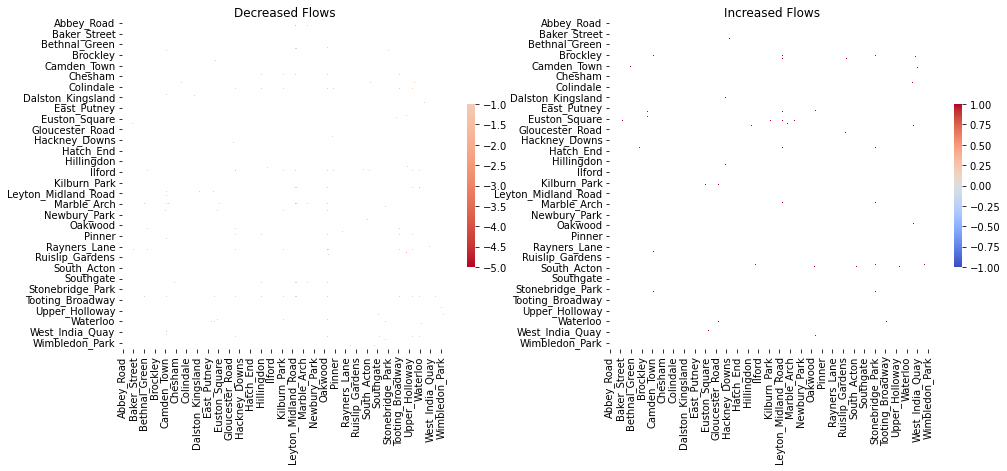

<Figure size 432x288 with 0 Axes>

In [55]:
plot_flow_changes(decreased_flows, increased_flows)

In [56]:
doubly_mat_1_2

station_destination,Abbey_Road,Acton_Central,Acton_Town,Aldgate,Aldgate_East,All_Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon_Park,Wood_Green,Wood_Lane,Wood_Street,Woodford,Woodgrange_Park,Woodside_Park,Woolwich_Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey_Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,600.0
Acton_Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton_Town,NaN,NaN,NaN,15.0,15.0,NaN,11.0,1.0,NaN,17.0,...,30.0,3.0,5.0,12.0,NaN,2.0,NaN,2.0,NaN,3747.0
Aldgate,NaN,NaN,2.0,NaN,42.0,NaN,NaN,0.0,NaN,19.0,...,7.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2877.0
Aldgate_East,NaN,NaN,2.0,49.0,NaN,NaN,1.0,0.0,NaN,21.0,...,8.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,31.0,33.0,NaN,NaN,NaN,NaN,29.0,...,29.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4864.0
Woodgrange_Park,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside_Park,NaN,NaN,5.0,18.0,17.0,NaN,3.0,NaN,NaN,22.0,...,21.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3094.0


In [57]:
doubly_mat_1_5

station_destination,Abbey_Road,Acton_Central,Acton_Town,Aldgate,Aldgate_East,All_Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon_Park,Wood_Green,Wood_Lane,Wood_Street,Woodford,Woodgrange_Park,Woodside_Park,Woolwich_Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey_Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,600.0
Acton_Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton_Town,NaN,NaN,NaN,15.0,15.0,NaN,11.0,1.0,NaN,17.0,...,30.0,3.0,5.0,12.0,NaN,2.0,NaN,2.0,NaN,3747.0
Aldgate,NaN,NaN,2.0,NaN,42.0,NaN,NaN,0.0,NaN,19.0,...,7.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2877.0
Aldgate_East,NaN,NaN,2.0,49.0,NaN,NaN,1.0,0.0,NaN,21.0,...,8.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,31.0,33.0,NaN,NaN,NaN,NaN,29.0,...,29.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4864.0
Woodgrange_Park,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside_Park,NaN,NaN,5.0,18.0,17.0,NaN,3.0,NaN,NaN,22.0,...,21.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3094.0


In [58]:
obs

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [59]:
# Example usage
decreased_flows, increased_flows, most_affected_flow = analyze_flow_changes(df_1_2, obs)
print(f"\nMost affected flow: Origin({most_affected_flow[0]}) -> Destination({most_affected_flow[1]}) with a {most_affected_flow[3]} of {abs(most_affected_flow[2])}")


KeyError: "['All'] not found in axis"

In [ ]:
decreased_flows, increased_flows, most_affected_flow = analyze_flow_changes(doubly_mat, doubly_mat_1_2)
print(f"\nMost affected flow: Origin({most_affected_flow[0]}) -> Destination({most_affected_flow[1]}) with a {most_affected_flow[3]} of {abs(most_affected_flow[2])}")

1. Increase D
2. make beta -2

IV.3. Discuss how the flows change for the 3 different situations: scenario A, and scenario B with two 
selections of parameters. Which scenario would have more impact in the redistribution of flows? 
Explain and justify your answers using the results of the analysis.

In [ ]:
cdata